## Final Project Submission

Please fill out:
* Student name: Sophia Mbataru
* Student pace: Full time
* Scheduled project review date/time: 30/09/2022
* Instructor name: Lucille, Antonny, William, Nikita
* Blog post URL: NIL


# Analysis and Prediction of House Sales in King County, USA

# Business Understanding

   King County is a county located in the U.S. state of Washington. The houses in King County comprises of a variety of features, for example, bedrooms, bathrooms/bedroom, square foot area of the house and lot, presence of a waterfront, views, condition of the house, grade assigned by the county, built year, renovated year and the location of the house. 
    The house prices and its spatial distribution are important for stakeholders in the real estate business particularly in metropolitan areas. Stakeholders, such as, external customers looking to purchase or sell a house in King County, they would require to decide on the house to choose based on the variety of parameters associated with the house prices. The objective of the study is to use statistical analysis to find the dependence of these variables on the price of houses, and which parameters affect the housing prices and which variables have minimal affect on the price of houses and ultimately make recommendations to stakeholers. The statistical tools used are, Correlation and Regression. Insights between the variables are drawn from scatter and regression plots, and histogram .


Null Hypothesis; There is no relationship between the chosen predictors (independent variables) and the target variable.

Alternate Hypothesis; There is a relationship between the chosen predictors and the target variable.



# Data Understanding
The dataset we have taken is House sales in King County, which can be found in kc_house_data.csv in the data folder. The data contains the prices of houses against a variety of parameters. 


In [36]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error

## Importing the Data


In [37]:
df = pd.read_csv('kc_house_data.csv')

In [38]:
#preview the data
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Let's look at the distribution of the dataset

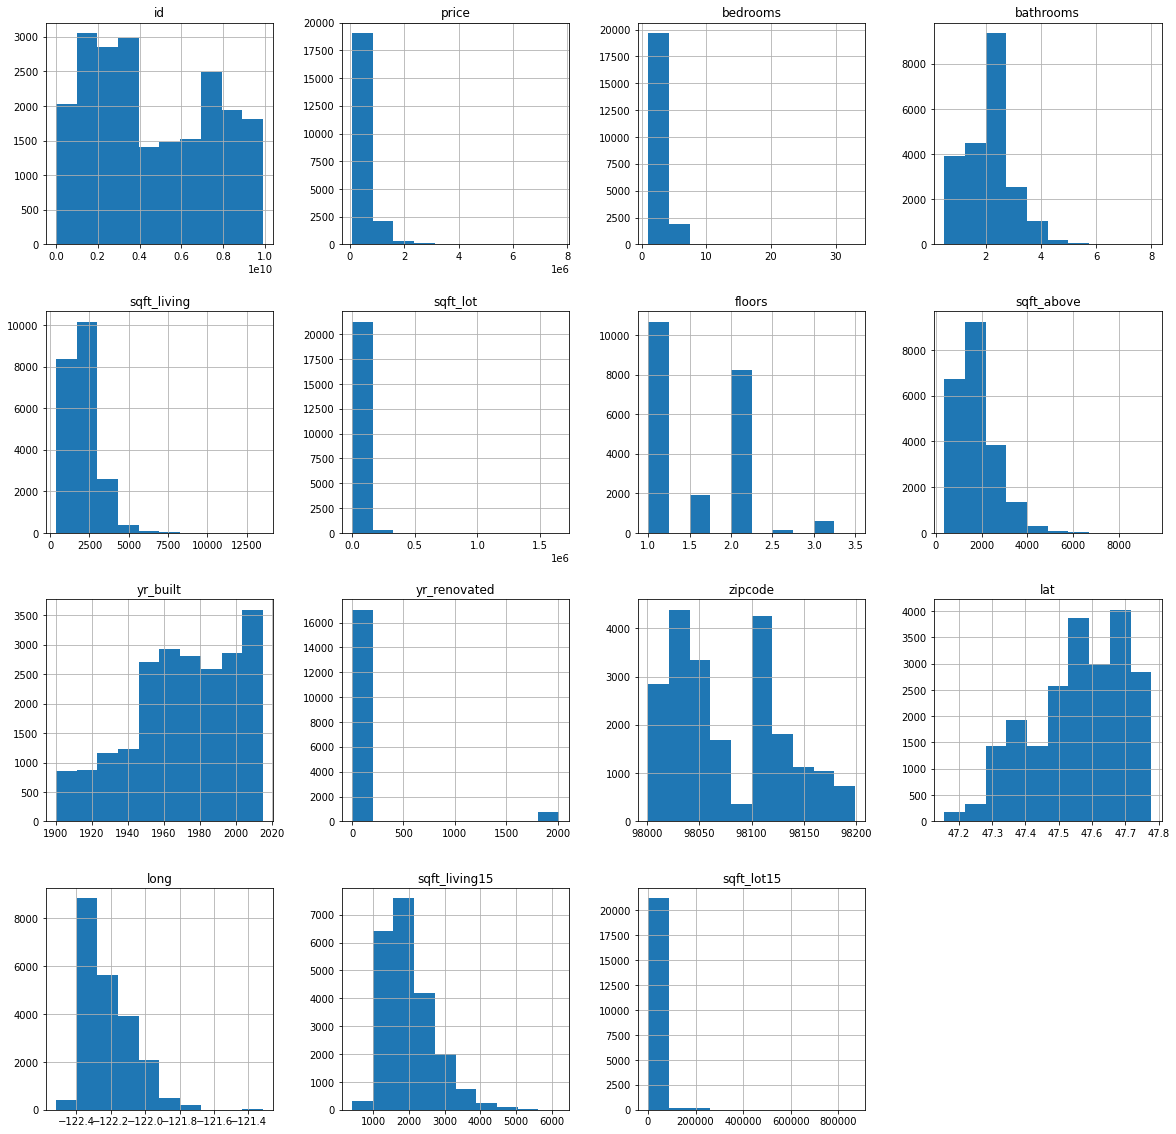

In [39]:
df.hist(figsize=(20,20));


Many of the variables do not follow a normal distribution, however regression does not require features to be normally distributed.

# Data Preparation

In [40]:
#Clean the data
#Let's drop columns that are not essential to our analysis

df.drop(["zipcode", "id", "date", "lat", "long", "yr_built", "sqft_basement", "yr_renovated"], axis = 1, inplace = True)


### Missing values

In [41]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [42]:
waterfront_null = (sum(df['waterfront'].isnull())/len(df['waterfront'])) * 100 
view_null = (sum(df['view'].isnull())/len(df['view'])) * 100 

print(f'The proportion of missing values in the column waterfront is {waterfront_null} %')
print(f'The proportion of missing values in the column view is {view_null} %')


The proportion of missing values in the column waterfront is 11.00152798999861 %
The proportion of missing values in the column view is 0.29170718155299347 %


Those are small percentages of missing values so I choose to drop the missing rows.

In [43]:
#handling missing values in column waterfront

#df['waterfront'].replace(['YES', 'NO'], [1, 0], inplace = True)

#fill the missing values in the column with 0 to indicate 'no waterfront'
#df['waterfront'].fillna(0, inplace = True)
df.dropna(subset = ['waterfront'], inplace = True)
df.dropna(subset = ['view'], inplace = True)


In [44]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values, we proceed:

### Outliers

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph. Some outliers may be useful to a model and others that should be removed. Thus, it's important to check dataset for outliers. In this dataset, the columns bathrooms and bedrooms has outliers that would through off the analysis and enable us obtain a type 1 error. For example, houses with more than 4 bathrooms or more than 10 bedrooms would have seperate price ranges since they contain much larger units.

In [45]:
#outlier values deviate much further from the mean and standard deviation
#bathrooms outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

168

In [46]:
#bedrooms outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3 

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

42


The above code treats any value that’s more than 3 standard deviations away from the mean as an outlier, and drops all the rows containing outliers.

In [47]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18954 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18954 non-null  float64
 1   bedrooms       18954 non-null  int64  
 2   bathrooms      18954 non-null  float64
 3   sqft_living    18954 non-null  int64  
 4   sqft_lot       18954 non-null  int64  
 5   floors         18954 non-null  float64
 6   waterfront     18954 non-null  object 
 7   view           18954 non-null  object 
 8   condition      18954 non-null  object 
 9   grade          18954 non-null  object 
 10  sqft_above     18954 non-null  int64  
 11  sqft_living15  18954 non-null  int64  
 12  sqft_lot15     18954 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.0+ MB


There is presence of categorical data i.e. grade, waterfront, condition and view.

### Prepare the categorical features for multiple regression modeling

Let's identify a promising predictor from the categorical features

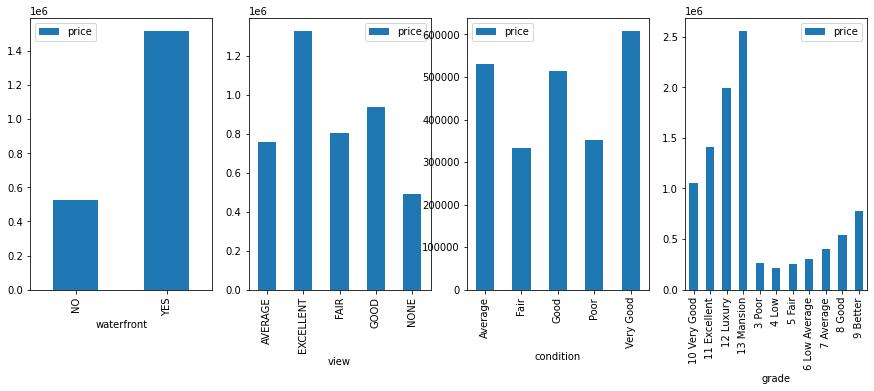

In [48]:
#plot the categorical features against price to determine the best predictor among them.
categorical_features = df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(15,5))

for index, feature in enumerate(categorical_features):
    df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Waterfront, view and condition are good categorical predictor columns to use in the model. 

### Setting up variables for regression
Let's look at correlations between the other variables and `price`:

In [50]:
df.corr()["price"]

price            1.000000
bedrooms         0.302951
bathrooms        0.489038
sqft_living      0.679044
sqft_lot         0.082558
floors           0.260424
sqft_above       0.581814
sqft_living15    0.591191
sqft_lot15       0.077142
Name: price, dtype: float64

Since correlation is a measure related to regression modeling, we can see that there seems to be some features that have medium-to-strong correlations with price. These features are sqft_living, grade,sqft_above, sqft_living15, and bathrooms.

The feature sqft_living has the strongest correlations, let's build a simple linear regression model and work with that as the baseline for our multiple linear regression model.

# Modeling

### Simple Linear regression (baseline model)

In [51]:
y = df['price'] #Our target variable
baseline_model = sm.OLS(y, sm.add_constant(df['sqft_living'])).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.622e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:17:13   Log-Likelihood:            -2.6198e+05
No. Observations:               18954   AIC:                         5.240e+05
Df Residuals:                   18952   BIC:                         5.240e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5514.3264   4561.819     -1.209      

### Simple Linear Regression Results

Model built is:

Price = -5514.3264  + 260.9181 sqft_living 

The model is statistically significant overall, with an F-statistic p-value well below 0.05.

The model explains about 46.1% of the variance in price.

The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05

If a house had a square foot of 0, we would expect price to be 5514.3264 dollars

For each increase of 1 house square foot, we see an associated increase in price of about 260.9181 


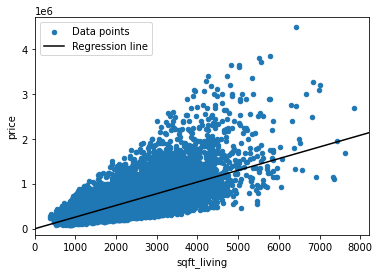

In [52]:
figfig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.legend();

And the residuals:

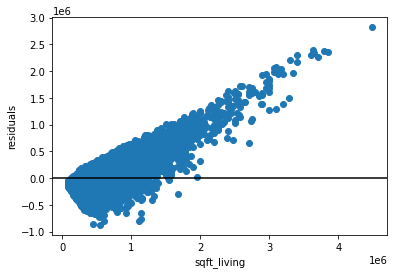

In [53]:
fig, ax = plt.subplots()

ax.scatter(df["price"], baseline_model.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple Regression with Many Features 

These additional features are grade, sqft_above, sqft_living15, bathrooms


In [54]:
#create an overall variable called (X_all) that contains the independent variables
#with the highest correlation with price for analysis
# drop price because this is our target, then only select numeric features

df_subset = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'floors', 'bedrooms', 'bathrooms']].copy()
features = df_subset.drop("price", axis=1).select_dtypes("number")
features

,sqft_living,sqft_above,sqft_living15,sqft_lot,sqft_lot15,floors,bedrooms,bathrooms
1,2570,2170,1690,7242,7639,2.0,3,2.25
2,770,770,2720,10000,8062,1.0,2,1.00
3,1960,1050,1360,5000,5000,1.0,4,3.00
4,1680,1680,1800,8080,7503,1.0,3,2.00
6,1715,1715,2238,6819,6819,2.0,3,2.25
...,...,...,...,...,...,...,...,...
21591,1310,1180,1330,1294,1265,2.0,3,2.50
21592,1530,1530,1530,1131,1509,3.0,3,2.50
21593,2310,2310,1830,5813,7200,2.0,4,2.50
21594,1020,1020,1020,1350,2007,2.0,2,0.75


In [55]:
model = sm.OLS(y, sm.add_constant(features)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2319.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:20:27   Log-Likelihood:            -2.6137e+05
No. Observations:               18954   AIC:                         5.228e+05
Df Residuals:                   18945   BIC:                         5.228e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.74e+04   8790.665      3.117

### Model with Many Features Visualization 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


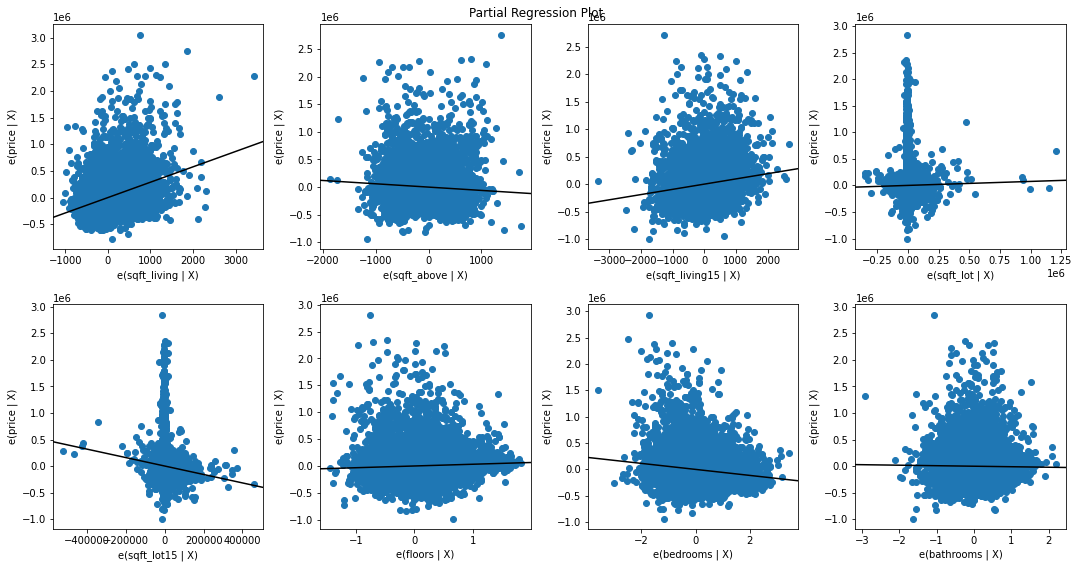

In [56]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(features.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

Let's look at the correlation of the features with 'price' again:

In [57]:
df.corr()["price"]

price            1.000000
bedrooms         0.302951
bathrooms        0.489038
sqft_living      0.679044
sqft_lot         0.082558
floors           0.260424
sqft_above       0.581814
sqft_living15    0.591191
sqft_lot15       0.077142
Name: price, dtype: float64

The ‘sqft_lot’, 'sqft_above', ‘floors’, and ‘bathrooms’ variables do not have a clear linear relationship with house price. Sqft_living has a stronger linear relationship with price than Sqft_living15, so it will be used in the multiple regression model. Due to its multicollinearity with Sqft_living15, Sqft_living15 will be excluded.



### Chosen Predictors


In [58]:
df['waterfront'].replace(['YES', 'NO'], [1, 0], inplace = True)

In [59]:
#include waterfront variable as potential categorical vaiable predictor
X_all = df[['sqft_living','sqft_lot15','bedrooms', 'waterfront']].copy()
X_all


,sqft_living,sqft_lot15,bedrooms,waterfront
1,2570,7639,3,0
2,770,8062,2,0
3,1960,5000,4,0
4,1680,7503,3,0
6,1715,6819,3,0
...,...,...,...,...
21591,1310,1265,3,0
21592,1530,1509,3,0
21593,2310,7200,4,0
21594,1020,2007,2,0


### One Hot Encoding 

In [60]:
X_all = pd.get_dummies(X_all, columns=["waterfront"], drop_first = True)
X_all

,sqft_living,sqft_lot15,bedrooms,waterfront_1
1,2570,7639,3,0
2,770,8062,2,0
3,1960,5000,4,0
4,1680,7503,3,0
6,1715,6819,3,0
...,...,...,...,...
21591,1310,1265,3,0
21592,1530,1509,3,0
21593,2310,7200,4,0
21594,1020,2007,2,0


### Final Multiple Regression Model with the Chosen Predictors 

In [61]:
final_model = sm.OLS(y, sm.add_constant(X_all))
results = final_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4988.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:24:07   Log-Likelihood:            -2.6102e+05
No. Observations:               18954   AIC:                         5.221e+05
Df Residuals:                   18949   BIC:                         5.221e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.192e+05   6763.595     17.625   

This time, the final model built is:

Price = 1.192e+05 + 291.1833sqft_living - -0.7265sqft_lot15 − 5.457e+04bedrooms + 7.342e+05waterfront_1

### Create Partial Regression Plots for the chosen predictors

For each feature of the regression above (including the dummy feature), plot the partial regression.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


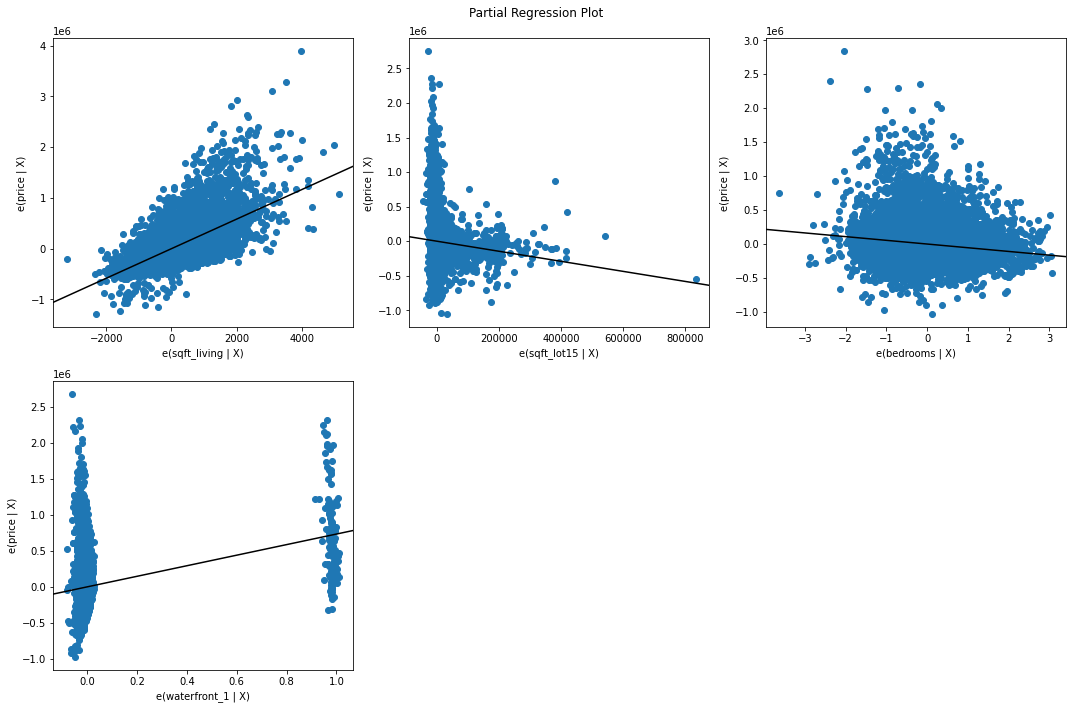

In [62]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X_all.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

# Evaluation

### Calculate Error-Based Metric

We'll calculate the mean absolute error

In [63]:
baseline_mae = mean_absolute_error(y, baseline_model.predict(sm.add_constant(df['sqft_living'])))


In [64]:
y_pred = results.predict(sm.add_constant(X_all))
final_model_mae = mean_absolute_error(y, y_pred)

In [65]:
baseline_mae, final_model_mae

(166350.62192683897, 159875.09332006477)

### Calculate adjusted R-Squared

In [66]:
baseline_model.rsquared_adj, results.rsquared_adj

(0.46107169815138016, 0.5127811244220679)

Overall the model performed marginally better. We were off by about 159,875 dollars rather than 166,350 dollars in a given prediction, and explained 51.3% rather than 46.1% of the
variance in price.

### Summary of Findings


The R-squared value, 0.513, indicates that the model can account for about 51.3% of the variability of price around its mean.

All our variables are statistically significant (p value < alpha (0.05)) meaning we can REJECT the null hypothesis for multiple regression which stated that there is no relationship between the chosen independent variables (predictors) and the response variable. 

# Conclusions

The data understanding, data preparation and data cleaning allowed me analyze, model and evaluate the data on the King County dataset. The key takeaways are that sqft_living, waterfront, sqft_lot15 and bedrooms are the best predictors of a house's price in King County.


# Recommendations

Based on these findings the recommendations to stakeholders such as external customers looking to purchase/sell a house in Kind County are:

1. Homeowners interested in selling their homes at a higher price should focus on expanding square footage of the living and lot are thus improving the quality of construction. 

2. When expanding square footage, homeowners should consider building additional bedrooms and waterfronts, as this analysis suggests that number of bedrooms and presence of waterfronts are positively related to price.



# Next Steps

The next steps I would pursue would be:
1. To explore the best predictors of the prices of homes outside of King County.

2. Given that outliers were removed, the model may also not accurately predict extreme values. I would also explore the predictors of the prices of homes with extreme price values.